In [1]:
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
    
sc = SparkContext()
sqlContext = SQLContext(sc)
spark = SparkSession(sc)

# load up other dependencies
import re
import pandas as pd

23/06/06 22:21:03 WARN Utils: Your hostname, Tanmays-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.123 instead (on interface en0)
23/06/06 22:21:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/06 22:21:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/Users/tanmaysingla/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [3]:
df = spark.read.text("/Users/tanmaysingla/Downloads/NASA_access_log_Aug95.gz") 
# /Users/tanmaysingla/Downloads/access_log_Jul95

In [4]:
df.printSchema()

root
 |-- value: string (nullable = true)



In [5]:
df.count()

1569898

In [6]:
sample_logs = [item['value'] for item in df.take(15)]
sample_logs

['in24.inetnebr.com - - [01/Aug/1995:00:00:01 -0400] "GET /shuttle/missions/sts-68/news/sts-68-mcc-05.txt HTTP/1.0" 200 1839',
 'uplherc.upl.com - - [01/Aug/1995:00:00:07 -0400] "GET / HTTP/1.0" 304 0',
 'uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/ksclogo-medium.gif HTTP/1.0" 304 0',
 'uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/MOSAIC-logosmall.gif HTTP/1.0" 304 0',
 'uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/USA-logosmall.gif HTTP/1.0" 304 0',
 'ix-esc-ca2-07.ix.netcom.com - - [01/Aug/1995:00:00:09 -0400] "GET /images/launch-logo.gif HTTP/1.0" 200 1713',
 'uplherc.upl.com - - [01/Aug/1995:00:00:10 -0400] "GET /images/WORLD-logosmall.gif HTTP/1.0" 304 0',
 'slppp6.intermind.net - - [01/Aug/1995:00:00:10 -0400] "GET /history/skylab/skylab.html HTTP/1.0" 200 1687',
 'piweba4y.prodigy.com - - [01/Aug/1995:00:00:10 -0400] "GET /images/launchmedium.gif HTTP/1.0" 200 11853',
 'slppp6.intermind.net - - [01/Aug/1995:00:00:11 -0400] "GET

In [7]:
host_pattern = r'(^\S+\.[\S+\.]+\S+)\s'
hosts = [re.search(host_pattern, item).group(1)
           if re.search(host_pattern, item)
           else 'no match'
           for item in sample_logs]
hosts

['in24.inetnebr.com',
 'uplherc.upl.com',
 'uplherc.upl.com',
 'uplherc.upl.com',
 'uplherc.upl.com',
 'ix-esc-ca2-07.ix.netcom.com',
 'uplherc.upl.com',
 'slppp6.intermind.net',
 'piweba4y.prodigy.com',
 'slppp6.intermind.net',
 'slppp6.intermind.net',
 'ix-esc-ca2-07.ix.netcom.com',
 'slppp6.intermind.net',
 'uplherc.upl.com',
 '133.43.96.45']

In [8]:
ts_pattern = r'\[(\d{2}/\w{3}/\d{4}:\d{2}:\d{2}:\d{2} -\d{4})\]'
timestamps = [re.search(ts_pattern, item).group(1) if re.search(ts_pattern, item) else 'no match' for item in sample_logs]
timestamps

['01/Aug/1995:00:00:01 -0400',
 '01/Aug/1995:00:00:07 -0400',
 '01/Aug/1995:00:00:08 -0400',
 '01/Aug/1995:00:00:08 -0400',
 '01/Aug/1995:00:00:08 -0400',
 '01/Aug/1995:00:00:09 -0400',
 '01/Aug/1995:00:00:10 -0400',
 '01/Aug/1995:00:00:10 -0400',
 '01/Aug/1995:00:00:10 -0400',
 '01/Aug/1995:00:00:11 -0400',
 '01/Aug/1995:00:00:12 -0400',
 '01/Aug/1995:00:00:12 -0400',
 '01/Aug/1995:00:00:13 -0400',
 '01/Aug/1995:00:00:14 -0400',
 '01/Aug/1995:00:00:16 -0400']

In [9]:
method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
               if re.search(method_uri_protocol_pattern, item)
               else 'no match'
              for item in sample_logs]
method_uri_protocol

[('GET', '/shuttle/missions/sts-68/news/sts-68-mcc-05.txt', 'HTTP/1.0'),
 ('GET', '/', 'HTTP/1.0'),
 ('GET', '/images/ksclogo-medium.gif', 'HTTP/1.0'),
 ('GET', '/images/MOSAIC-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/images/USA-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/images/launch-logo.gif', 'HTTP/1.0'),
 ('GET', '/images/WORLD-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/history/skylab/skylab.html', 'HTTP/1.0'),
 ('GET', '/images/launchmedium.gif', 'HTTP/1.0'),
 ('GET', '/history/skylab/skylab-small.gif', 'HTTP/1.0'),
 ('GET', '/images/ksclogosmall.gif', 'HTTP/1.0'),
 ('GET', '/history/apollo/images/apollo-logo1.gif', 'HTTP/1.0'),
 ('GET', '/history/apollo/images/apollo-logo.gif', 'HTTP/1.0'),
 ('GET', '/images/NASA-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/shuttle/missions/sts-69/mission-sts-69.html', 'HTTP/1.0')]

In [10]:
status_pattern = r'\s(\d{3})\s'
status = [re.search(status_pattern, item).group(1) for item in sample_logs]
print(status)

['200', '304', '304', '304', '304', '200', '304', '200', '200', '200', '200', '200', '200', '304', '200']


In [11]:
content_size_pattern = r'\s(\d+)$'
content_size = [re.search(content_size_pattern, item).group(1) for item in sample_logs]
print(content_size)

['1839', '0', '0', '0', '0', '1713', '0', '1687', '11853', '9202', '3635', '1173', '3047', '0', '10566']


In [12]:
from pyspark.sql.functions import regexp_extract

logs_df = df.select(regexp_extract('value', host_pattern, 1).alias('host'),
                         regexp_extract('value', ts_pattern, 1).alias('timestamp'),
                         regexp_extract('value', method_uri_protocol_pattern, 1).alias('method'),
                         regexp_extract('value', method_uri_protocol_pattern, 2).alias('endpoint'),
                         regexp_extract('value', method_uri_protocol_pattern, 3).alias('protocol'),
                         regexp_extract('value', status_pattern, 1).cast('integer').alias('status'),
                         regexp_extract('value', content_size_pattern, 1).cast('integer').alias('content_size'))
logs_df.show(10, truncate=True)
print((logs_df.count(), len(logs_df.columns)))

+--------------------+--------------------+------+--------------------+--------+------+------------+
|                host|           timestamp|method|            endpoint|protocol|status|content_size|
+--------------------+--------------------+------+--------------------+--------+------+------------+
|   in24.inetnebr.com|01/Aug/1995:00:00...|   GET|/shuttle/missions...|HTTP/1.0|   200|        1839|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|                   /|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/ksclogo-m...|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/MOSAIC-lo...|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/USA-logos...|HTTP/1.0|   304|           0|
|ix-esc-ca2-07.ix....|01/Aug/1995:00:00...|   GET|/images/launch-lo...|HTTP/1.0|   200|        1713|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/WORLD-log...|HTTP/1.0|   304|    

In [13]:
df.filter(df['value'].isNull()).count()

0

In [14]:
bad_rows_df = logs_df.filter(logs_df['host'].isNull()| 
                             logs_df['timestamp'].isNull() | 
                             logs_df['method'].isNull() |
                             logs_df['endpoint'].isNull() |
                             logs_df['status'].isNull() |
                             logs_df['content_size'].isNull()|
                             logs_df['protocol'].isNull())
bad_rows_df.count()

14178

In [15]:

from pyspark.sql.functions import col
from pyspark.sql.functions import sum as spark_sum

def count_null(col_name):
    return spark_sum(col(col_name).isNull().cast('integer')).alias(col_name)

# Build up a list of column expressions, one per column.
exprs = [count_null(col_name) for col_name in logs_df.columns]

# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
logs_df.agg(*exprs).show()

+----+---------+------+--------+--------+------+------------+
|host|timestamp|method|endpoint|protocol|status|content_size|
+----+---------+------+--------+--------+------+------------+
|   0|        0|     0|       0|       0|     0|       14178|
+----+---------+------+--------+--------+------+------------+



In [16]:
logs_df = logs_df.na.fill({'content_size': 0})
exprs = [count_null(col_name) for col_name in logs_df.columns]
logs_df.agg(*exprs).show()

+----+---------+------+--------+--------+------+------------+
|host|timestamp|method|endpoint|protocol|status|content_size|
+----+---------+------+--------+--------+------+------------+
|   0|        0|     0|       0|       0|     0|           0|
+----+---------+------+--------+--------+------+------------+



In [17]:
from pyspark.sql.functions import udf

month_map = {
  'Jan': 1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
  'Aug':8,  'Sep': 9, 'Oct':10, 'Nov': 11, 'Dec': 12
}

def parse_clf_time(text):
    """ Convert Common Log time format into a Python datetime object
    Args:
        text (str): date and time in Apache time format [dd/mmm/yyyy:hh:mm:ss (+/-)zzzz]
    Returns:
        a string suitable for passing to CAST('timestamp')
    """
    # NOTE: We're ignoring the time zones here, might need to be handled depending on the problem you are solving
    return "{0:04d}-{1:02d}-{2:02d} {3:02d}:{4:02d}:{5:02d}".format(
      int(text[7:11]),
      month_map[text[3:6]],
      int(text[0:2]),
      int(text[12:14]),
      int(text[15:17]),
      int(text[18:20])
    )

In [18]:
udf_parse_time = udf(parse_clf_time)

logs_df = (logs_df.select('*', udf_parse_time(logs_df['timestamp']).cast('timestamp').alias('time')).drop('timestamp'))
logs_df.show(10, truncate=True)

+--------------------+------+--------------------+--------+------+------------+-------------------+
|                host|method|            endpoint|protocol|status|content_size|               time|
+--------------------+------+--------------------+--------+------+------------+-------------------+
|   in24.inetnebr.com|   GET|/shuttle/missions...|HTTP/1.0|   200|        1839|1995-08-01 00:00:01|
|     uplherc.upl.com|   GET|                   /|HTTP/1.0|   304|           0|1995-08-01 00:00:07|
|     uplherc.upl.com|   GET|/images/ksclogo-m...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|     uplherc.upl.com|   GET|/images/MOSAIC-lo...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|     uplherc.upl.com|   GET|/images/USA-logos...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|ix-esc-ca2-07.ix....|   GET|/images/launch-lo...|HTTP/1.0|   200|        1713|1995-08-01 00:00:09|
|     uplherc.upl.com|   GET|/images/WORLD-log...|HTTP/1.0|   304|           0|1995-08-01 00:00:10|


In [19]:
logs_df.cache()

DataFrame[host: string, method: string, endpoint: string, protocol: string, status: int, content_size: int, time: timestamp]

In [20]:
content_size_summary_df = logs_df.describe(['content_size'])
content_size_summary_df.toPandas()

,summary,content_size
0,count,1569898
1,mean,17089.225812122826
2,stddev,67954.76392156907
3,min,0
4,max,3421948


In [21]:
from pyspark.sql import functions as F

(logs_df.agg(F.min(logs_df['content_size']).alias('min_content_size'),
             F.max(logs_df['content_size']).alias('max_content_size'),
             F.mean(logs_df['content_size']).alias('mean_content_size'),
             F.stddev(logs_df['content_size']).alias('std_content_size'),
             F.count(logs_df['content_size']).alias('count_content_size'))
        .toPandas())

,min_content_size,max_content_size,mean_content_size,std_content_size,count_content_size
0,0,3421948,17089.225812,67954.763922,1569898


In [22]:
status_freq_df = (logs_df
                     .groupBy('status')
                     .count()
                     .sort('status')
                     .cache())
print('Total distinct HTTP Status Codes:', status_freq_df.count())

Total distinct HTTP Status Codes: 8


In [23]:
status_freq_df.show(10)

+------+-------+
|status|  count|
+------+-------+
|   200|1398988|
|   302|  26497|
|   304| 134146|
|   400|     10|
|   403|    171|
|   404|  10056|
|   500|      3|
|   501|     27|
+------+-------+



In [24]:
status_freq_pd_df = (status_freq_df
                         .toPandas()
                         .sort_values(by=['count'],
                                      ascending=False))
status_freq_pd_df

,status,count
0,200,1398988
2,304,134146
1,302,26497
5,404,10056
4,403,171
7,501,27
3,400,10
6,500,3


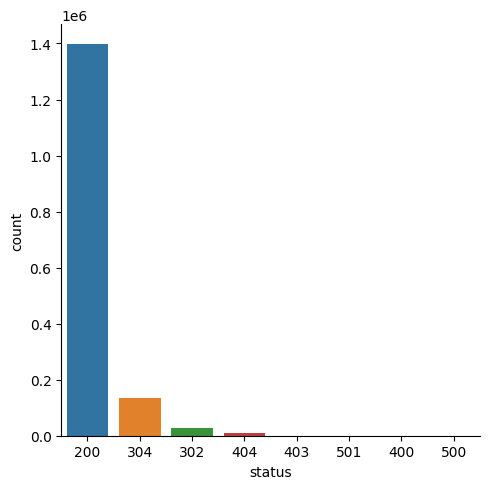

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.catplot(x='status', y='count', data=status_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['status'])

In [26]:
log_freq_df = status_freq_df.withColumn('log(count)', 
                                        F.log(status_freq_df['count']))
log_freq_df.show()

+------+-------+------------------+
|status|  count|        log(count)|
+------+-------+------------------+
|   200|1398988|14.151259676055433|
|   302|  26497|10.184786798018687|
|   304| 134146|11.806684038040606|
|   400|     10| 2.302585092994046|
|   403|    171|  5.14166355650266|
|   404|  10056| 9.215924750270084|
|   500|      3|1.0986122886681096|
|   501|     27| 3.295836866004329|
+------+-------+------------------+



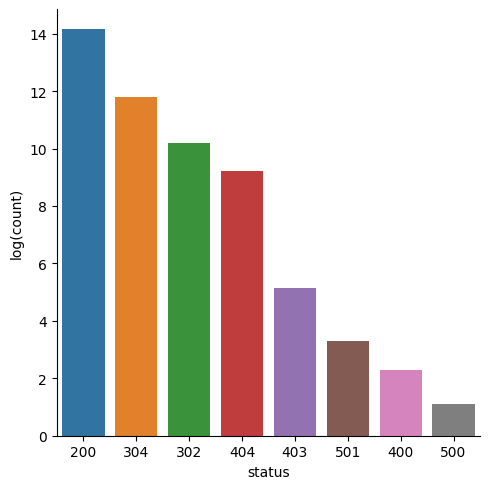

In [27]:
log_freq_pd_df = (log_freq_df
                    .toPandas()
                    .sort_values(by=['log(count)'],
                                 ascending=False))
sns.catplot(x='status', y='log(count)', data=log_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['status'])

In [28]:
host_sum_df =(logs_df
               .groupBy('host')
               .count()
               .sort('count', ascending=False).limit(10))

host_sum_df.show(truncate=False)

+--------------------+-----+
|host                |count|
+--------------------+-----+
|edams.ksc.nasa.gov  |6530 |
|piweba4y.prodigy.com|4846 |
|163.206.89.4        |4791 |
|piweba5y.prodigy.com|4607 |
|piweba3y.prodigy.com|4416 |
|www-d1.proxy.aol.com|3889 |
|www-b2.proxy.aol.com|3534 |
|www-b3.proxy.aol.com|3463 |
|www-c5.proxy.aol.com|3423 |
|www-b5.proxy.aol.com|3411 |
+--------------------+-----+



In [29]:
paths_df = (logs_df
            .groupBy('endpoint')
            .count()
            .sort('count', ascending=False).limit(20))

paths_pd_df = paths_df.toPandas()
paths_pd_df 

,endpoint,count
0,/images/NASA-logosmall.gif,97384
1,/images/KSC-logosmall.gif,75332
2,/images/MOSAIC-logosmall.gif,67441
3,/images/USA-logosmall.gif,67061
4,/images/WORLD-logosmall.gif,66437
5,/images/ksclogo-medium.gif,62771
6,/ksc.html,43683
7,/history/apollo/images/apollo-logo1.gif,37824
8,/images/launch-logo.gif,35135
9,/,30328


In [30]:
not200_df = (logs_df
               .filter(logs_df['status'] != 200))

error_endpoints_freq_df = (not200_df
                               .groupBy('endpoint')
                               .count()
                               .sort('count', ascending=False)
                               .limit(10)
                          )
                          
error_endpoints_freq_df.show(truncate=False)   

+----------------------------------------+-----+
|endpoint                                |count|
+----------------------------------------+-----+
|/images/NASA-logosmall.gif              |19072|
|/images/KSC-logosmall.gif               |11328|
|/images/MOSAIC-logosmall.gif            |8617 |
|/images/USA-logosmall.gif               |8565 |
|/images/WORLD-logosmall.gif             |8360 |
|/images/ksclogo-medium.gif              |7722 |
|/history/apollo/images/apollo-logo1.gif |4355 |
|/shuttle/countdown/images/countclock.gif|4227 |
|/images/launch-logo.gif                 |4178 |
|/                                       |3605 |
+----------------------------------------+-----+



In [31]:
unique_host_count = (logs_df
                     .select('host')
                     .distinct()
                     .count())
unique_host_count

75029

In [32]:
host_day_df = logs_df.select(logs_df.host, 
                             F.dayofmonth('time').alias('day'))
host_day_df.show(5, truncate=False)

+-----------------+---+
|host             |day|
+-----------------+---+
|in24.inetnebr.com|1  |
|uplherc.upl.com  |1  |
|uplherc.upl.com  |1  |
|uplherc.upl.com  |1  |
|uplherc.upl.com  |1  |
+-----------------+---+
only showing top 5 rows



In [33]:
host_day_distinct_df = (host_day_df
                          .dropDuplicates())
host_day_distinct_df.show(5, truncate=False)

+------------------------+---+
|host                    |day|
+------------------------+---+
|194.96.3.34             |1  |
|132.165.96.3            |1  |
|slip37-202.il.us.ibm.net|1  |
|199.1.50.225            |1  |
|ppp1004.po.iijnet.or.jp |1  |
+------------------------+---+
only showing top 5 rows



In [34]:
# def_mr = pd.get_option('max_rows')
# pd.set_option('max_rows', 10)

daily_hosts_df = (host_day_distinct_df
                     .groupBy('day')
                     .count()
                     .sort("day"))

daily_hosts_df = daily_hosts_df.toPandas()
daily_hosts_df

,day,count
0,1,2578
1,3,3220
2,4,4189
3,5,2502
4,6,2537
5,7,4104
6,8,4401
7,9,4313
8,10,4520
9,11,4343


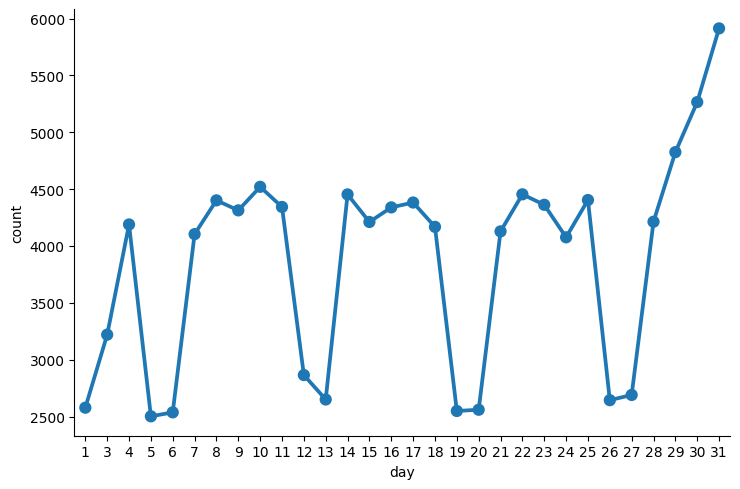

In [35]:
c = sns.catplot(x='day', y='count', 
                data=daily_hosts_df, 
                kind='point', height=5, 
                aspect=1.5)

In [36]:

daily_hosts_df = (host_day_distinct_df
                     .groupBy('day')
                     .count()
                     .select(col("day"), 
                                      col("count").alias("total_hosts")))

total_daily_reqests_df = (logs_df
                              .select(F.dayofmonth("time")
                                          .alias("day"))
                              .groupBy("day")
                              .count()
                              .select(col("day"), 
                                      col("count").alias("total_reqs")))

avg_daily_reqests_per_host_df = total_daily_reqests_df.join(daily_hosts_df, 'day')
avg_daily_reqests_per_host_df = (avg_daily_reqests_per_host_df
                                    .withColumn('avg_reqs', col('total_reqs') / col('total_hosts'))
                                    .sort("day"))
avg_daily_reqests_per_host_df = avg_daily_reqests_per_host_df.toPandas()
avg_daily_reqests_per_host_df

,day,total_reqs,total_hosts,avg_reqs
0,1,33996,2578,13.186967
1,3,41388,3220,12.853416
2,4,59557,4189,14.217474
3,5,31893,2502,12.747002
4,6,32420,2537,12.778873
5,7,57362,4104,13.977096
6,8,60157,4401,13.668939
7,9,60458,4313,14.017621
8,10,61248,4520,13.550442
9,11,61246,4343,14.102233


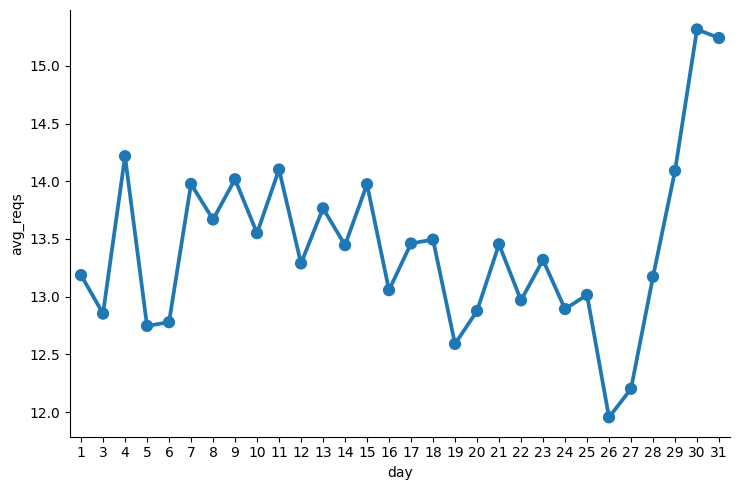

In [37]:
c = sns.catplot(x='day', y='avg_reqs', 
                data=avg_daily_reqests_per_host_df, 
                kind='point', height=5, aspect=1.5)

In [38]:
not_found_df = logs_df.filter(logs_df["status"] == 404).cache()
print(('Total 404 responses: {}').format(not_found_df.count()))

Total 404 responses: 10056


In [39]:
endpoints_404_count_df = (not_found_df
                          .groupBy("endpoint")
                          .count()
                          .sort("count", ascending=False)
                          .limit(20))

endpoints_404_count_df.show(truncate=False)

+-----------------------------------------------------------------+-----+
|endpoint                                                         |count|
+-----------------------------------------------------------------+-----+
|/pub/winvn/readme.txt                                            |1337 |
|/pub/winvn/release.txt                                           |1185 |
|/shuttle/missions/STS-69/mission-STS-69.html                     |683  |
|/images/nasa-logo.gif                                            |319  |
|/shuttle/missions/sts-68/ksc-upclose.gif                         |253  |
|/elv/DELTA/uncons.htm                                            |209  |
|/history/apollo/sa-1/sa-1-patch-small.gif                        |200  |
|/://spacelink.msfc.nasa.gov                                      |166  |
|/images/crawlerway-logo.gif                                      |160  |
|/history/apollo/a-001/a-001-patch-small.gif                      |154  |
|/history/apollo/pad-abort-test-1/pad-

In [40]:
hosts_404_count_df = (not_found_df
                          .groupBy("host")
                          .count()
                          .sort("count", ascending=False)
                          .limit(20))

hosts_404_count_df.show(truncate=False)

+--------------------------+-----+
|host                      |count|
+--------------------------+-----+
|dialip-217.den.mmc.com    |62   |
|piweba3y.prodigy.com      |47   |
|155.148.25.4              |44   |
|maz3.maz.net              |39   |
|gate.barr.com             |38   |
|m38-370-9.mit.edu         |37   |
|ts8-1.westwood.ts.ucla.edu|37   |
|nexus.mlckew.edu.au       |37   |
|204.62.245.32             |37   |
|scooter.pa-x.dec.com      |35   |
|reddragon.ksc.nasa.gov    |33   |
|www-c4.proxy.aol.com      |32   |
|piweba5y.prodigy.com      |31   |
|www-d4.proxy.aol.com      |30   |
|piweba4y.prodigy.com      |30   |
|internet-gw.watson.ibm.com|29   |
|163.206.104.34            |28   |
|unidata.com               |28   |
|                          |28   |
|spica.sci.isas.ac.jp      |27   |
+--------------------------+-----+



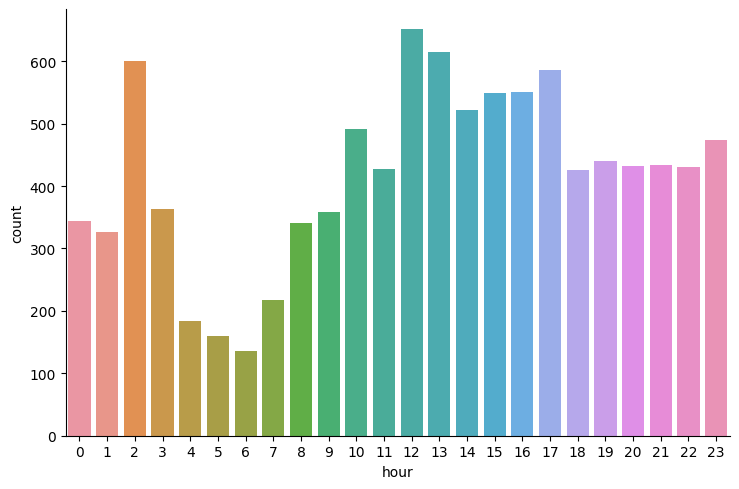

In [41]:
hourly_avg_errors_sorted_df = (not_found_df
                                   .groupBy(F.hour('time')
                                             .alias('hour'))
                                   .count()
                                   .sort('hour'))
hourly_avg_errors_sorted_pd_df = hourly_avg_errors_sorted_df.toPandas()

c = sns.catplot(x='hour', y='count', 
                data=hourly_avg_errors_sorted_pd_df, 
                kind='bar', height=5, aspect=1.5)